**Import Libraries**

In [113]:
# Import Libraries
import numpy as np
import pandas as pd

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process


#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
sns.set_style('white')
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import random
import time
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

In [18]:
campaign_data = pd.read_csv("C:\\Users\\Yoganand\\Desktop\\bank-additional-full.csv")
campaign_data_validate = pd.read_csv("C:\\Users\\Yoganand\\Desktop\\bank-additional.csv")

In [19]:
datasets = [campaign_data_validate, campaign_data_validate]

In [21]:
campaign_data.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
31903,35,management,married,university.degree,no,no,no,cellular,may,thu,...,3,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
14430,25,management,single,university.degree,no,no,no,cellular,jul,tue,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
12255,39,admin.,single,high.school,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
37168,37,admin.,married,university.degree,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,no
37664,56,management,married,university.degree,no,yes,no,cellular,aug,tue,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.859,5076.2,yes


In [11]:
campaign_data_validate.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
888,31,housemaid,single,professional.course,unknown,yes,yes,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
1864,35,self-employed,married,university.degree,no,no,yes,telephone,may,thu,...,6,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
282,31,self-employed,single,university.degree,no,no,no,cellular,aug,mon,...,1,999,2,failure,-1.7,94.027,-38.3,0.898,4991.6,no
2696,31,admin.,married,university.degree,no,no,no,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
1320,58,admin.,single,university.degree,no,no,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [47]:
campaign_data['cons.conf.idx']= abs(campaign_data['cons.conf.idx'])
campaign_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,no


In [23]:
campaign_data_validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [26]:
campaign_data.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [27]:
campaign_data_validate.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2509,1264,3315,2175,3349,2652,1378,860,...,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [28]:
for dataset in datasets:
  for col in dataset.columns:
    dataset[col] = dataset[col].replace('unknown', np.NAN)

In [29]:
campaign_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [30]:
percent_null_campaign_data= (campaign_data.isnull().sum()/ len(campaign_data)) * 100
percent_null_campaign_data

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [31]:
campaign_data_validate.isnull().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [32]:
percent_null_campaign_data_validate= (campaign_data_validate.isnull().sum()/ len(campaign_data_validate)) * 100
percent_null_campaign_data_validate

age                0.000000
job                0.946832
marital            0.267055
education          4.054382
default           19.495023
housing            2.549162
loan               2.549162
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

**Handling missing values!**

In [33]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in datasets:    
    
    #complete job with mode
    dataset['job'].fillna(dataset['job'].mode()[0], inplace = True)
    
    #complete marital with mode
    dataset['marital'].fillna(dataset['marital'].mode()[0], inplace = True)
    
    #complete education with mode
    dataset['education'].fillna(dataset['education'].mode()[0], inplace = True)
    
    #complete default with mode
    dataset['default'].fillna(dataset['default'].mode()[0], inplace = True)
    
    #complete housing with mode
    dataset['housing'].fillna(dataset['housing'].mode()[0], inplace = True)
    
    #complete loan with mode
    dataset['loan'].fillna(dataset['loan'].mode()[0], inplace = True)
    
print(campaign_data.isnull().sum())
print("-"*10)
print(campaign_data_validate.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
----------
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [134]:
num_cols = [ 'age','duration','pdays','emp.var.rate', 'cons.price.idx',
             'cons.conf.idx', 'euribor3m', 'nr.employed']
subset_num_data = campaign_data[num_cols]
subset_num_data.head()

,age,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,999,1.1,93.994,36.4,4.857,5191.0
1,57,149,999,1.1,93.994,36.4,4.857,5191.0
2,37,226,999,1.1,93.994,36.4,4.857,5191.0
3,40,151,999,1.1,93.994,36.4,4.857,5191.0
4,56,307,999,1.1,93.994,36.4,4.857,5191.0


In [ ]:
# DATA VISUAlISATION 
I havent added 1. Heatmap, 2. pairplot 

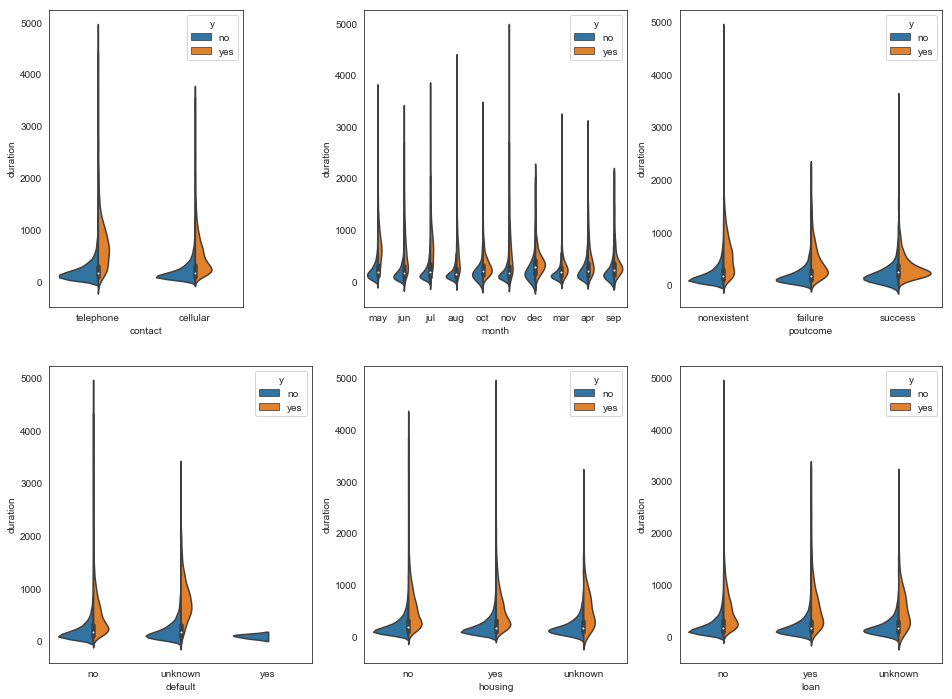

In [127]:
Violin Plot - Age, pdays did not give much inferences so dropped.','emp.var.rate', 'cons.price.idx',
             'cons.conf.idx', 'euribor3m', 'nr.employed' - not recognised as labels have dot and not underscore
Violin Plot - Duration
plt.figure(figsize=[16,12])
plt.subplot(231)
sns.violinplot(x=campaign_data.day_of_week, y=campaign_data.duration, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(232)
sns.violinplot(x=campaign_data.month, y=campaign_data.duration, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(233)
sns.violinplot(x=campaign_data.poutcome, y=campaign_data.duration, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(234)
sns.violinplot(x=campaign_data.default, y=campaign_data.duration, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(235)
sns.violinplot(x=campaign_data.housing, y=campaign_data.duration, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(236)
sns.violinplot(x=campaign_data.loan, y=campaign_data.duration, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)

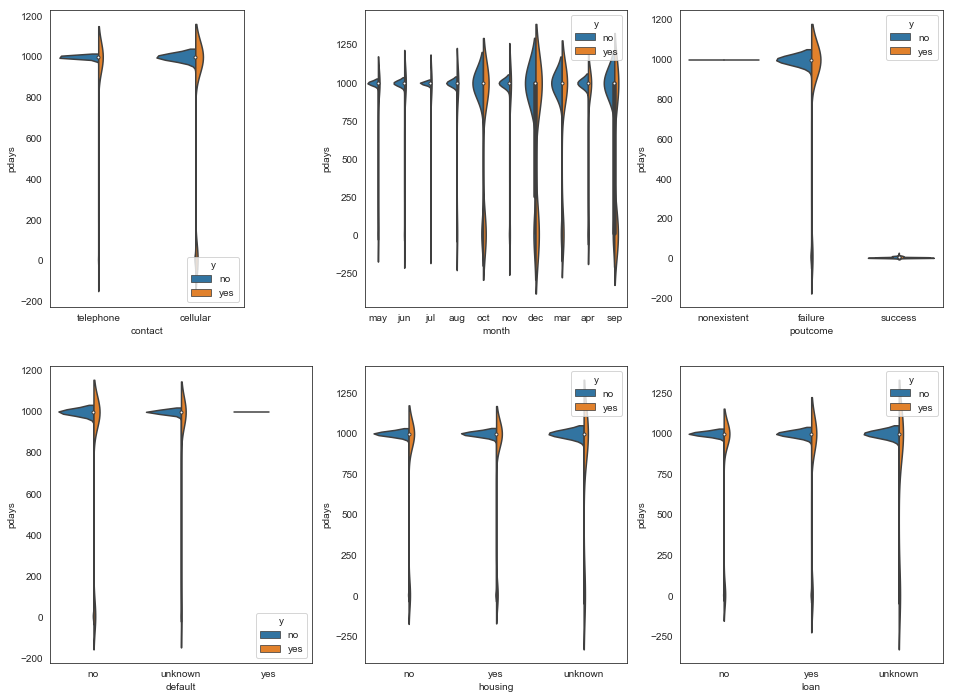

In [132]:
Violin Plot - Campaign
plt.figure(figsize=[16,12])
plt.subplot(231)
sns.violinplot(x=campaign_data.day_of_week, y=campaign_data.pdays, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(232)
sns.violinplot(x=campaign_data.month, y=campaign_data.pdays, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(233)
sns.violinplot(x=campaign_data.poutcome, y=campaign_data.pdays, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(234)
sns.violinplot(x=campaign_data.default, y=campaign_data.pdays, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(235)
sns.violinplot(x=campaign_data.housing, y=campaign_data.pdays, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(236)
sns.violinplot(x=campaign_data.loan, y=campaign_data.pdays, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)

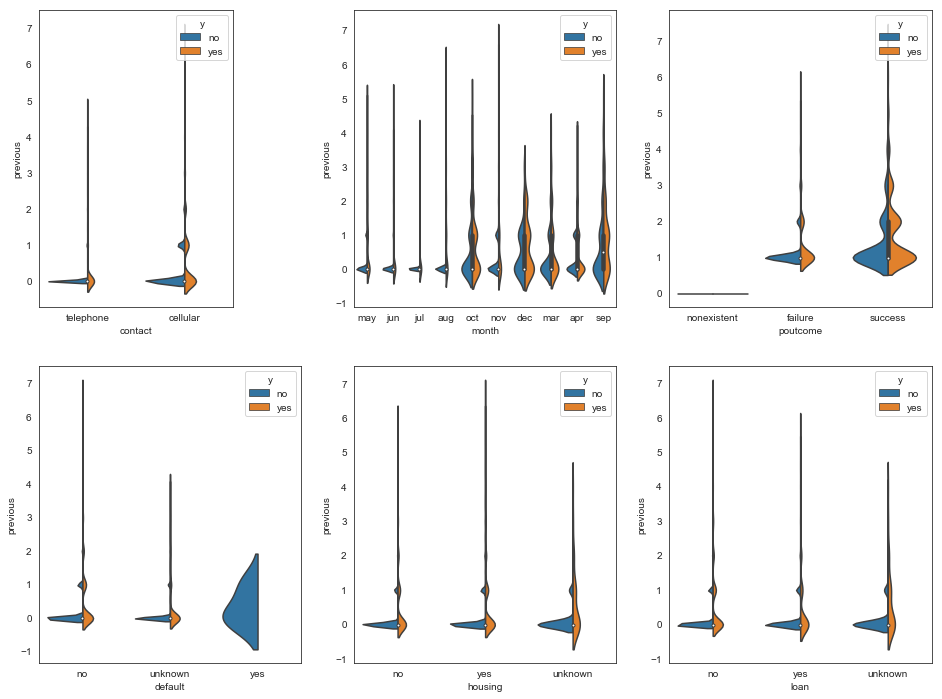

In [133]:
Violin Plot - Previous
plt.figure(figsize=[16,12])
plt.subplot(231)
sns.violinplot(x=campaign_data.day_of_week, y=campaign_data.previous, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(232)
sns.violinplot(x=campaign_data.month, y=campaign_data.previous, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(233)
sns.violinplot(x=campaign_data.poutcome, y=campaign_data.previous, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(234)
sns.violinplot(x=campaign_data.default, y=campaign_data.previous, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(235)
sns.violinplot(x=campaign_data.housing, y=campaign_data.previous, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)
plt.subplot(236)
sns.violinplot(x=campaign_data.loan, y=campaign_data.previous, hue=campaign_data.y, data=campaign_data, palatte='muted',split=True)

NameError: name 'yes' is not defined

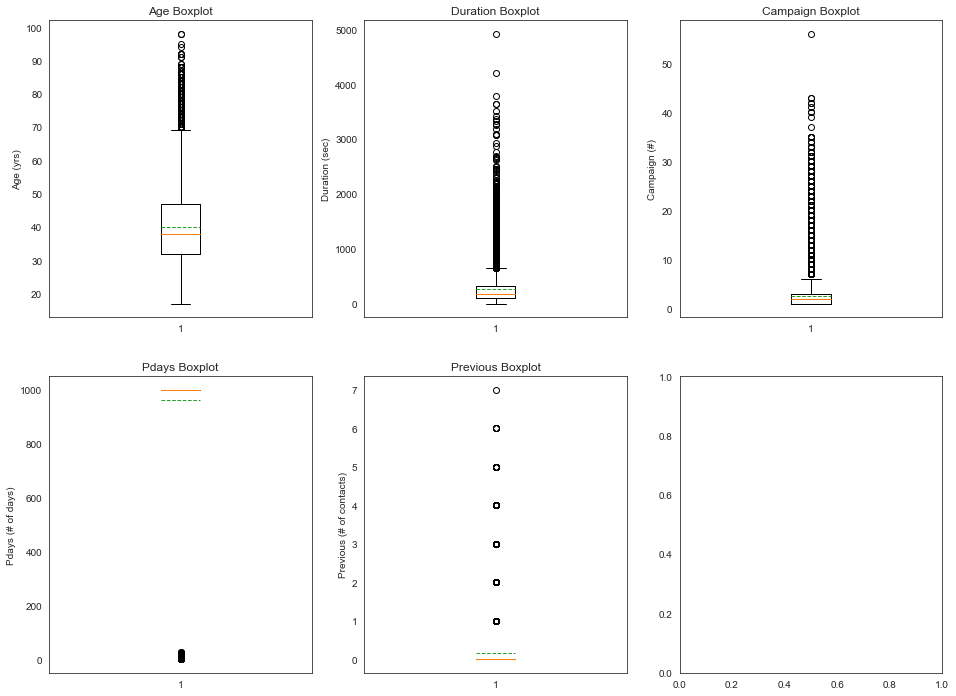

In [147]:
#Box plot and Histogram  - issue with hist

plt.figure(figsize=[16,12])
plt.subplot(231)
plt.boxplot(x=campaign_data['age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (yrs)')

plt.subplot(232)
plt.boxplot(campaign_data['duration'], showmeans = True, meanline = True)
plt.title('Duration Boxplot')
plt.ylabel('Duration (sec)')

plt.subplot(233)
plt.boxplot(campaign_data['campaign'], showmeans = True, meanline = True)
plt.title('Campaign Boxplot')
plt.ylabel('Campaign (#)')

plt.subplot(234)
plt.boxplot(campaign_data['pdays'], showmeans = True, meanline = True)
plt.title('Pdays Boxplot')
plt.ylabel('Pdays (# of days)')

plt.subplot(235)
plt.boxplot(campaign_data['previous'], showmeans = True, meanline = True)
plt.title('Previous Boxplot')
plt.ylabel('Previous (# of contacts)')

plt.subplot(236)
plt.hist(x = [campaign_data[campaign_data['y']==yes]['age'], campaign_data[campaign_data['y']==no]['age']], 
         stacked=True, color = ['g','r'],label = ['yes','no'])
plt.title('Age Histogram by clients subscribed')
plt.xlabel('Age (yrs)')
plt.ylabel('# of clients subscribed')
plt.legend()

plt.subplot(237)
plt.hist(x = [campaign_data[campaign_data['y']==yes]['duration'], campaign_data[campaign_data['y']==no]['duration']], 
         stacked=True, color = ['g','r'],label = ['yes','no'])
plt.title('Duration Histogram by clients subscribed')
plt.xlabel('Duration (sec)')
plt.ylabel('# of clients subscribed')
plt.legend()

plt.subplot(238)
plt.hist(x = [campaign_data[campaign_data['y']==yes]['campaign'], campaign_data[campaign_data['y']==no]['campaign']], 
         stacked=True, color = ['g','r'],label = ['yes','no'])
plt.title('Campaign Histogram by clients subscribed')
plt.xlabel('Campaign (last contact)')
plt.ylabel('# of clients subscribed')
plt.legend()

plt.subplot(239)
plt.hist(x = [campaign_data[campaign_data['y']==yes]['pdays'], campaign_data[campaign_data['y']==no]['pdays']], 
         stacked=True, color = ['g','r'],label = ['yes','no'])
plt.title('Pdays Histogram by clients subscribed')
plt.xlabel('Pdays (# of days)')
plt.ylabel('# of clients subscribed')
plt.legend()

plt.subplot(240)
plt.hist(x = [campaign_data[campaign_data['y']==yes]['previous'], campaign_data[campaign_data['y']==no]['previous']], 
         stacked=True, color = ['g','r'],label = ['yes','no'])
plt.title('Previous Histogram by clients subscribed')
plt.xlabel('Previous (# of contacts)')
plt.ylabel('# of clients subscribed')
plt.legend()

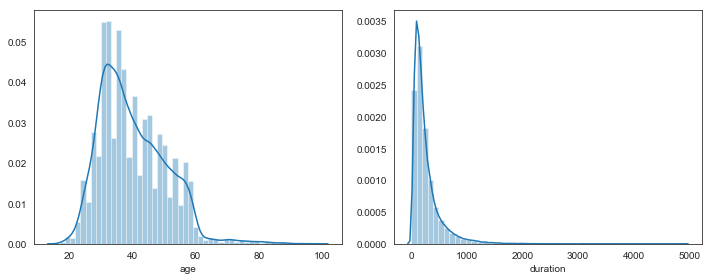

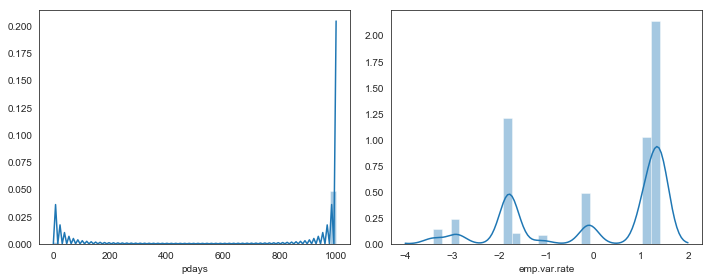

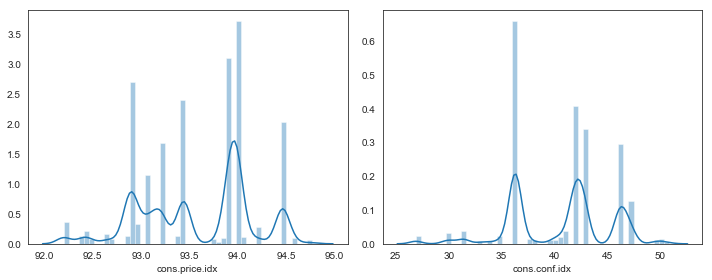

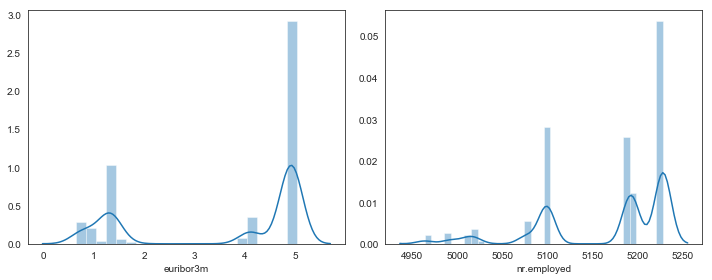

In [150]:
# Distribution plots 
num_cols = [ 'age','duration','pdays','emp.var.rate', 'cons.price.idx',
             'cons.conf.idx', 'euribor3m', 'nr.employed']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(campaign_data[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(campaign_data[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(campaign_data[num_cols[i]], hist=True, kde=True)

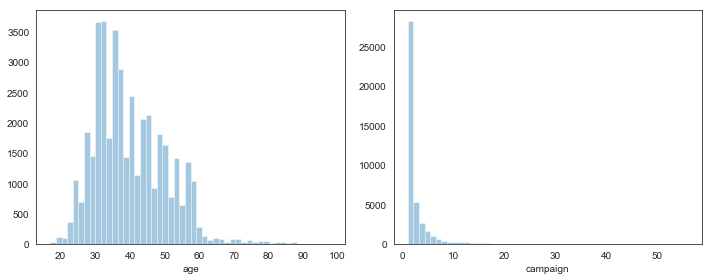

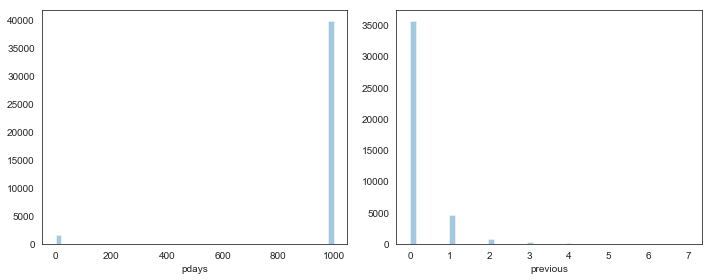

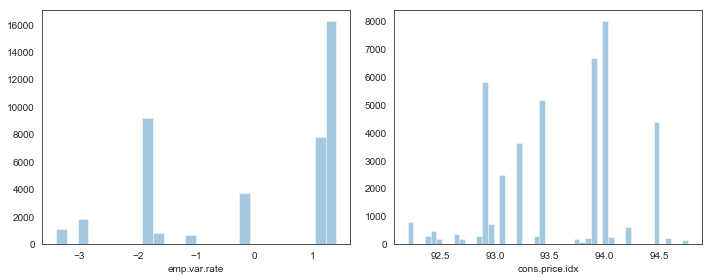

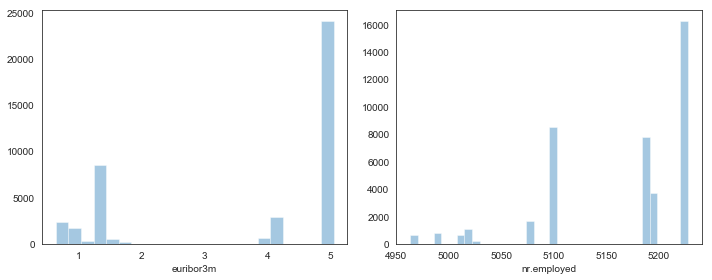

In [156]:
num_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m','nr.employed' ]
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(campaign_data[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(campaign_data[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(data[num_cols[i]], kde=False)

TypeError: can't multiply sequence by non-int of type 'float'

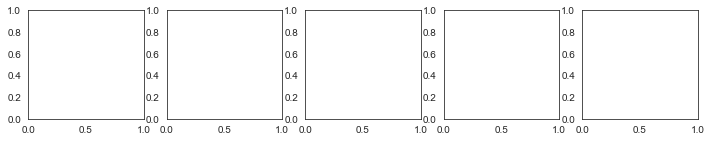

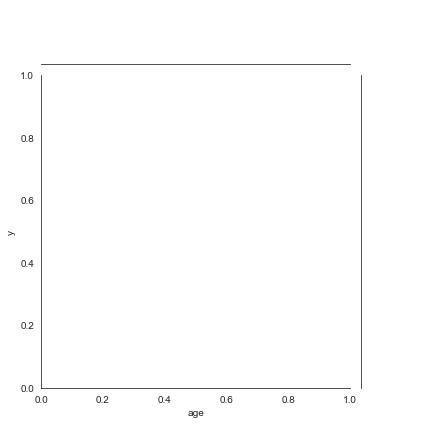

In [148]:
# Joint plots 
fig, saxis = plt.subplots(1, 5,figsize=(12,2))
sns.jointplot('age', 'y', data=campaign_data, kind='hex')
sns.jointplot('duration', 'y', data=campaign_data, kind='hex')
sns.jointplot('campaign', 'y', data=campaign_data, kind='hex')
sns.jointplot('pdays', 'y', data=campaign_data, kind='hex')
sns.jointplot('previous', 'y', data=campaign_data, kind='hex')

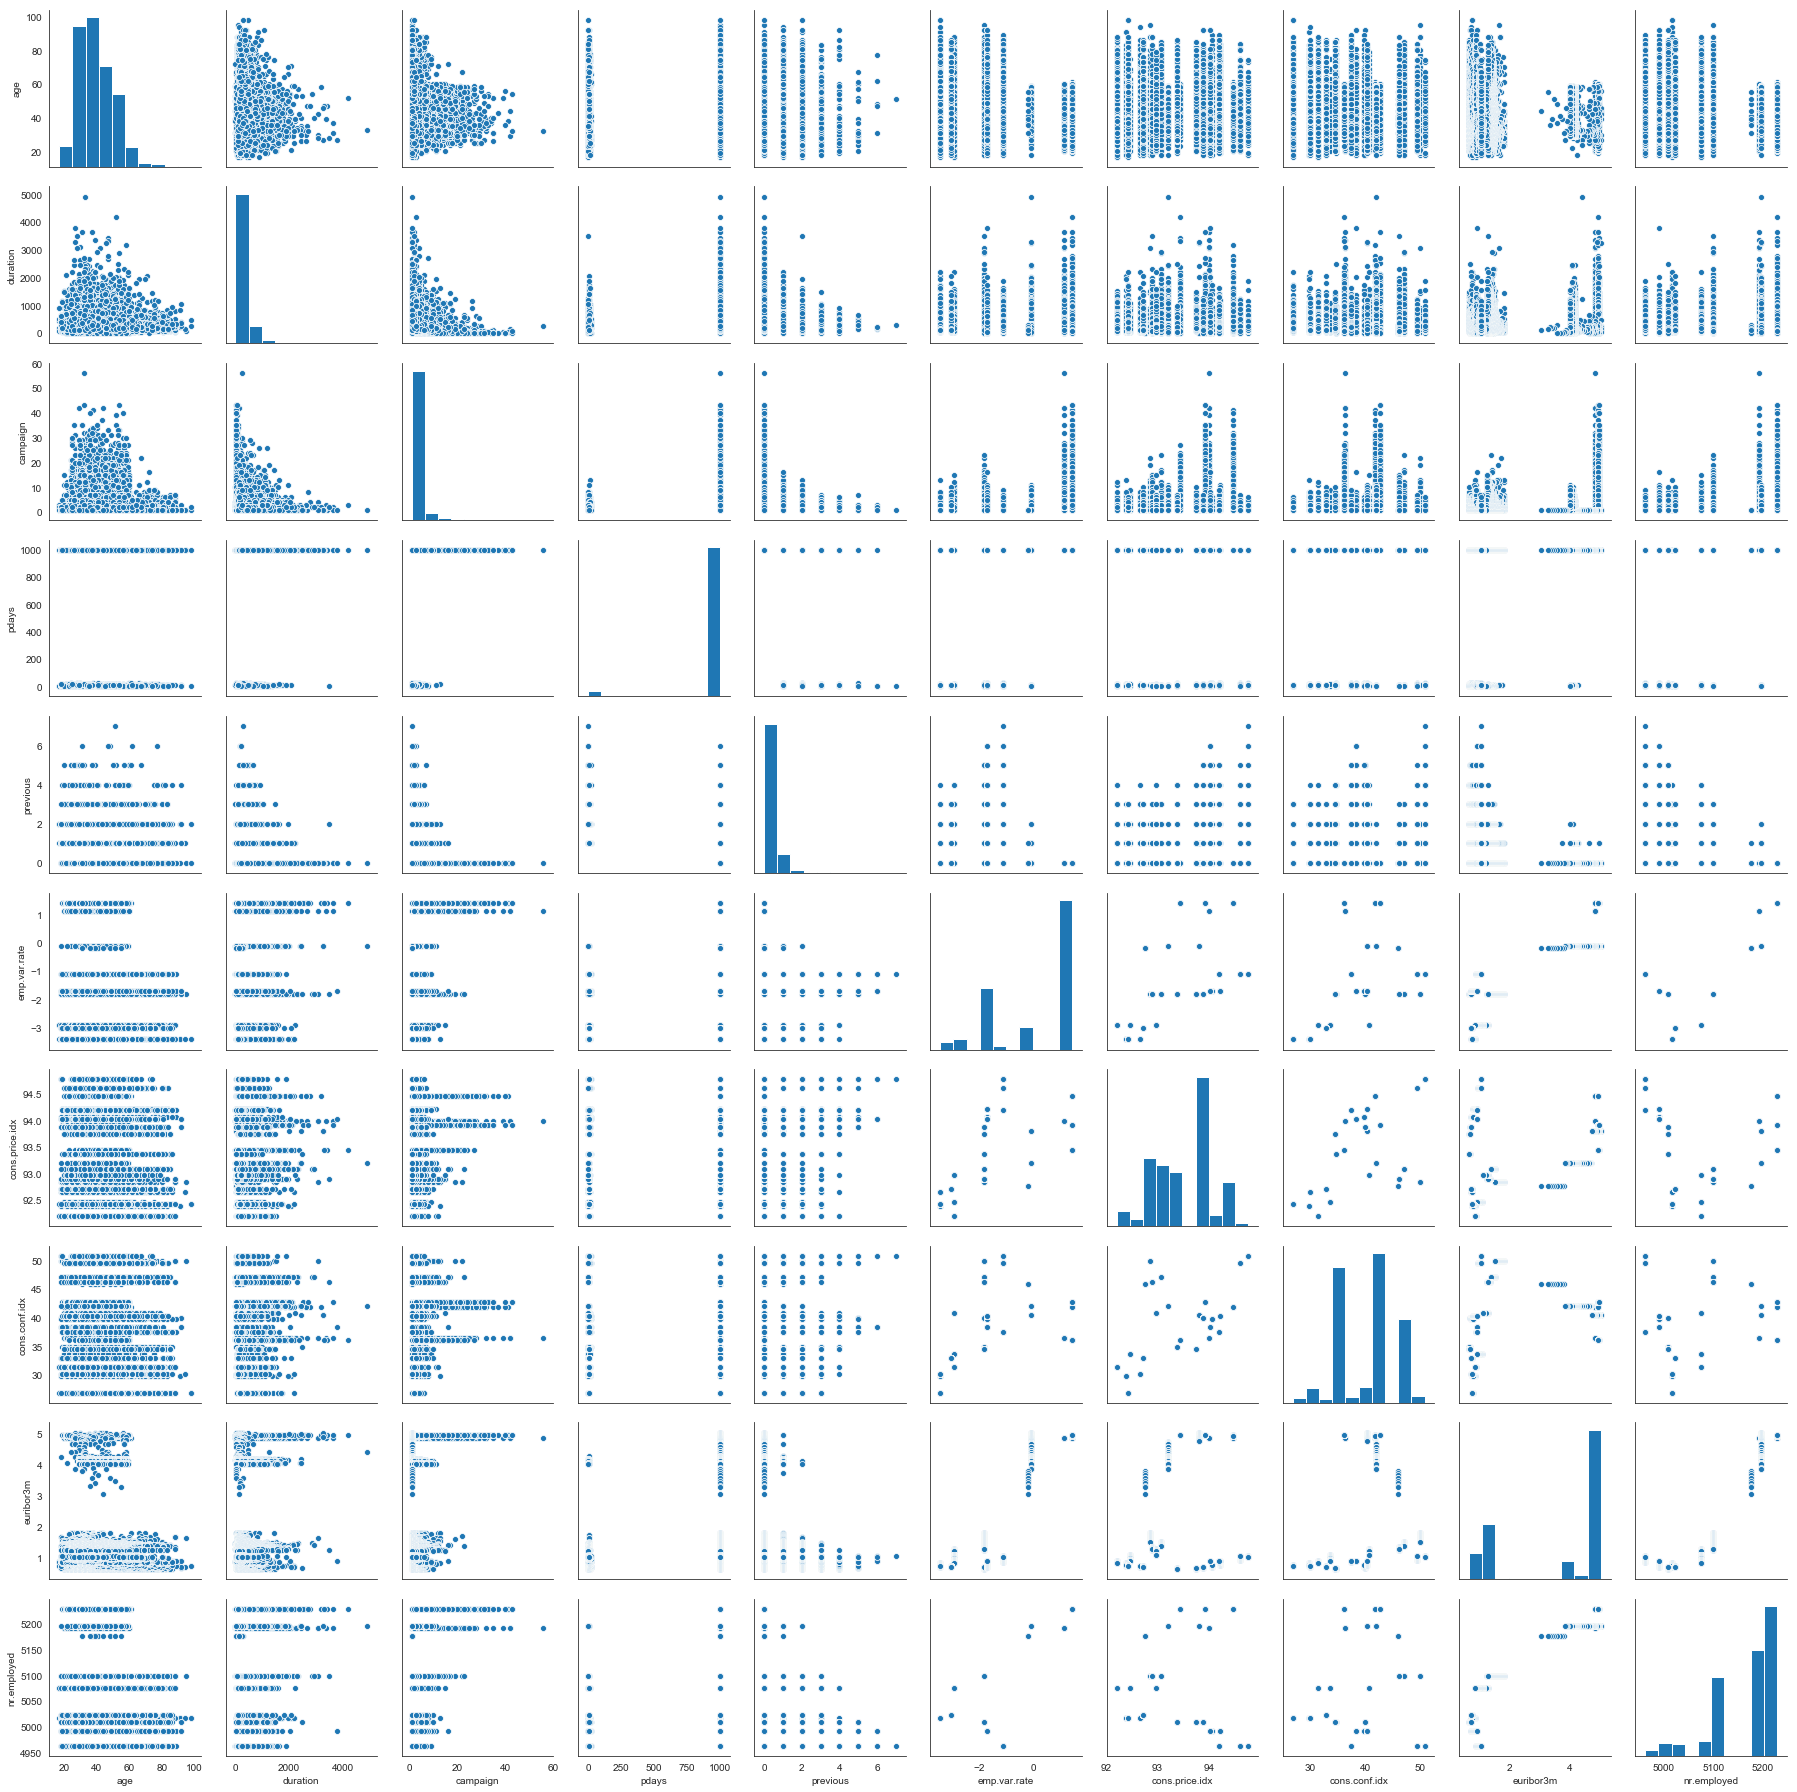

In [103]:
# Pairplots
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
sns.pairplot(campaign_data[cols])

AttributeError: 'DataFrame' object has no attribute 'emp'

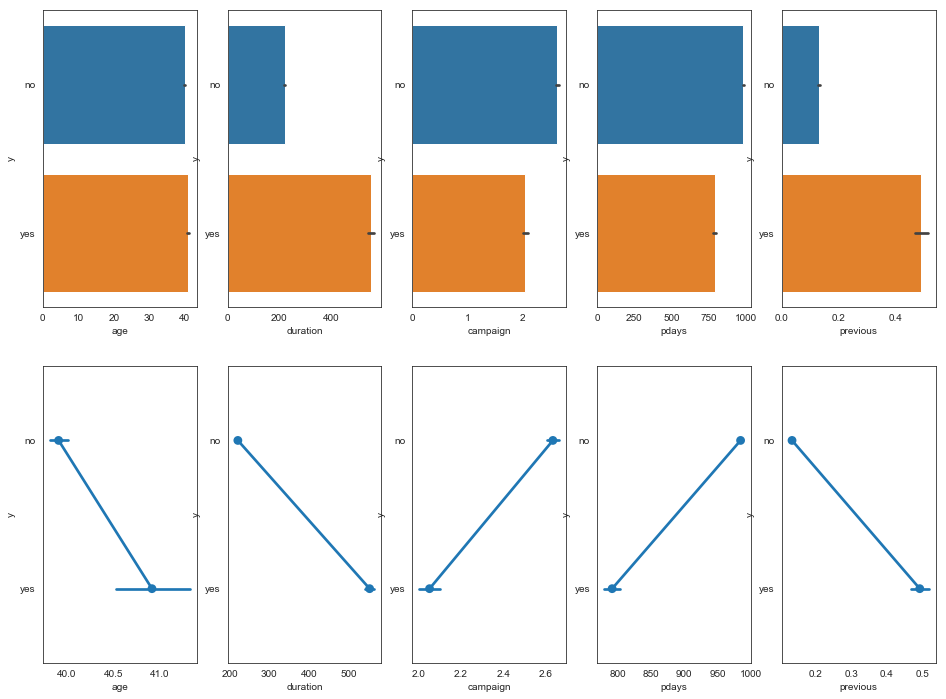

In [112]:
# Barplot and Point plot as per chinmays notebook is giving error 
fig, saxis = plt.subplots(2, 5,figsize=(16,12))

sns.barplot(x = 'age', y = 'y', data=campaign_data, ax = saxis[0,0])
sns.barplot(x = 'duration', y = 'y', data=campaign_data, ax = saxis[0,1])
sns.barplot(x = 'campaign', y = 'y', data=campaign_data, ax = saxis[0,2])
sns.barplot(x = 'pdays', y = 'y', data=campaign_data, ax = saxis[0,3])
sns.barplot(x = 'previous', y = 'y', data=campaign_data, ax = saxis[0,4])

sns.pointplot(x = 'age', y = 'y',  data=campaign_data, ax = saxis[1,0])
sns.pointplot(x = 'duration', y = 'y',  data=campaign_data, ax = saxis[1,1])
sns.pointplot(x = 'campaign', y = 'y', data=campaign_data, ax = saxis[1,2])
sns.pointplot(x = 'pdays', y = 'y', data=campaign_data, ax = saxis[1,3])
sns.pointplot(x = 'previous', y = 'y', data=campaign_data, ax = saxis[1,4])

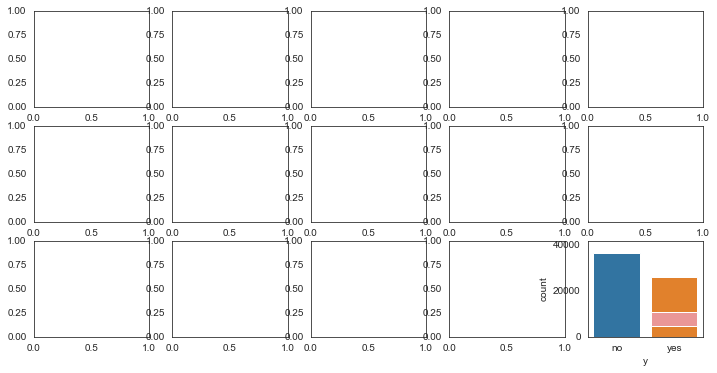

In [155]:
# Count Plots
fig, saxis = plt.subplots(3, 5,figsize=(12,6))
sns.countplot('age', data=campaign_data)
sns.countplot('job', data=campaign_data)
sns.countplot('marital', data=campaign_data)
sns.countplot('education', data=campaign_data)
sns.countplot('default', data=campaign_data)
sns.countplot('loan', data=campaign_data)
sns.countplot('contact', data=campaign_data)
sns.countplot('month', data=campaign_data)
sns.countplot('day_of_week', data=campaign_data)
sns.countplot('duration', data=campaign_data)
sns.countplot('campaign', data=campaign_data)
sns.countplot('pdays', data=campaign_data)
sns.countplot('poutcome', data=campaign_data)
sns.countplot('emp.var.rate', data=campaign_data)
sns.countplot('y', data=campaign_data)